### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

### Puxando os dados

In [2]:
# Crio uma função para buscar determinados dados do site do banco central
def buscar_bc(code):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(code)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [3]:
# Busco os códigos de cada série temporal
m2 = buscar_bc(27810)
mb = buscar_bc(1788)
res = buscar_bc(3547)
emp = buscar_bc(3556)

In [4]:
# m2 veio com valores vazios em certas datas, eu completei com nan
m2 = m2.replace(r'^\s*$', np.nan, regex=True)

### Visualizando os dados

In [5]:
# Faço uma função para plotar gráficos
def plotar(series, title='', log=False, yline=None):
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(series, label=title, lw=3)
    ax.legend(loc='best')
    ax.set_title(title)
    if log == True:
        ax.set_yscale('log')
    if yline != None:
        ax.axhline(y=yline, linestyle='--', color='red')
    plt.grid(linestyle='--', axis='y')
    plt.show()

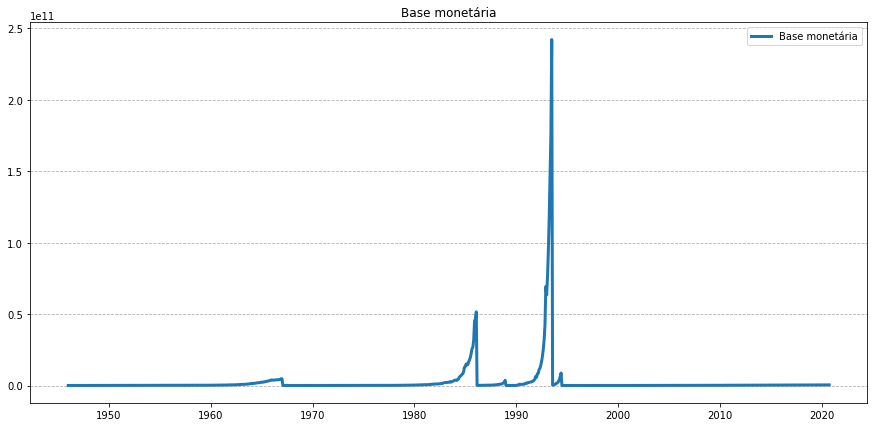

In [6]:
plotar(series=mb, title='Base monetária')

In [7]:
# 
start = '1998-01'
end = '2020-07'

m2 = m2[start:end]
mb = mb[start:end]

In [8]:
mb_mean = mb.rolling(4).mean()
mb_mean_pct = mb_mean.pct_change()

### Análise sobre a base monetária

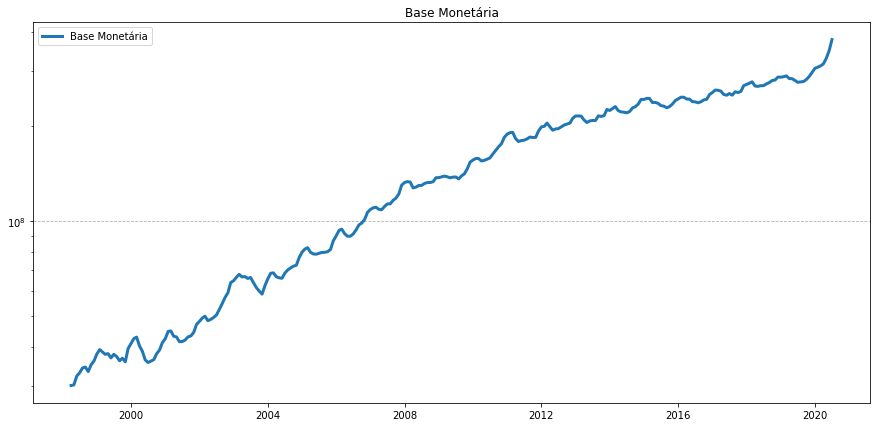

In [11]:
plotar(series=mb_mean, title='Base Monetária', log=True)

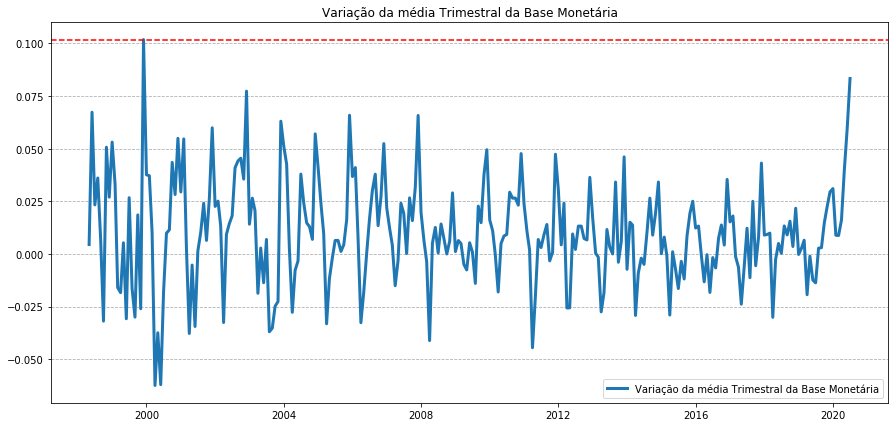

In [22]:
plotar(series=mb_mean_pct, title='Variação da média Trimestral da Base Monetária', yline=mb_mean_pct.max().item())

### Análise sobre M2

In [9]:
m2_mean = m2.rolling(4).mean()
m2_mean_pct = m2_mean.pct_change()

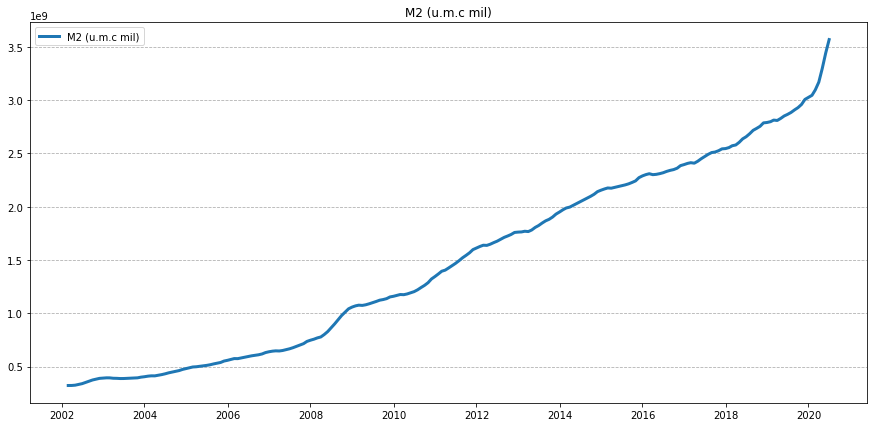

In [13]:
plotar(series=m2_mean, title='M2 (u.m.c mil)')

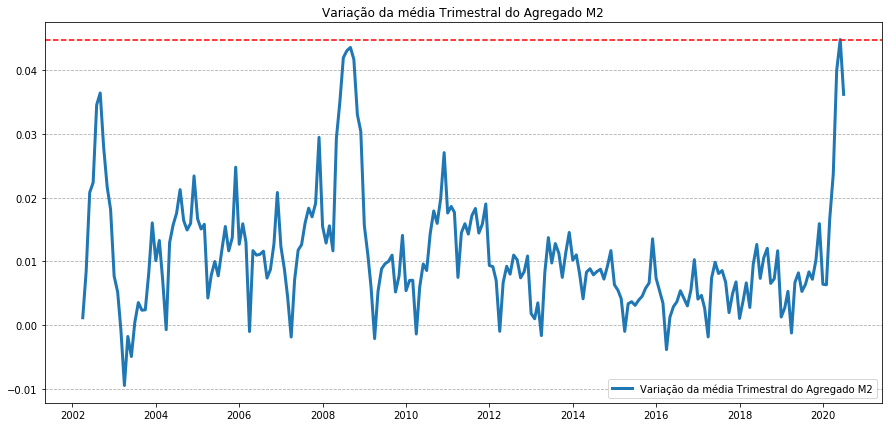

In [14]:
plotar(series=m2_mean_pct, title='Variação da média Trimestral do Agregado M2', yline=m2_mean_pct.max().item())

### Análise sobre as reservas cambiais

In [10]:
res_mean = res.rolling(6).mean()
res_mean_pct = res_mean.pct_change()

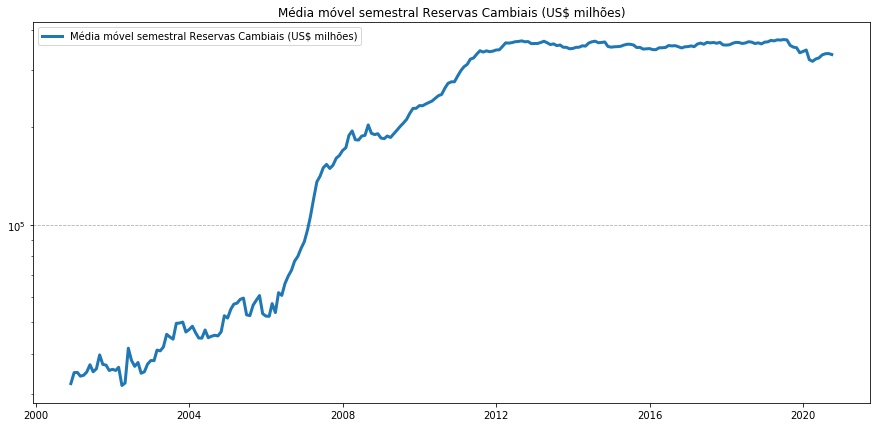

In [24]:
plotar(series=res, title='Média móvel semestral Reservas Cambiais (US$ milhões)', log=True)

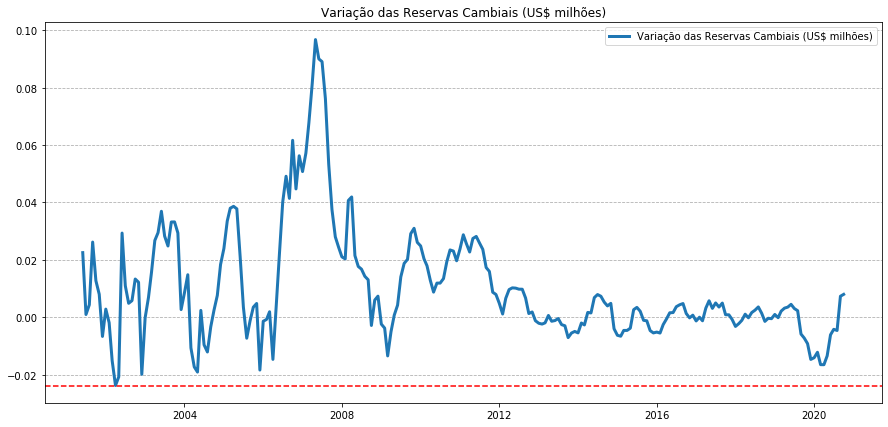

In [27]:
plotar(series=res_mean_pct, title='Variação das Reservas Cambiais (US$ milhões)', yline=res_mean_pct.min().item())

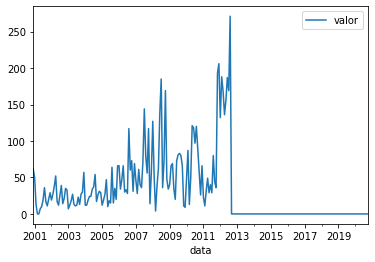

In [29]:
emp.plot()

In [30]:
emp = buscar_bc(24369)

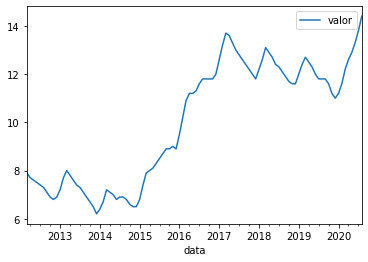

In [32]:
emp.plot()

In [37]:
emp1 = buscar_bc(10777)

In [36]:
emp

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-04-01,12.6
2020-05-01,12.9
2020-06-01,13.3


In [49]:
df = pd.concat([emp1, emp])

In [65]:
df.loc['2012-03':] =  emp.loc['2012-03':]

No handles with labels found to put in legend.


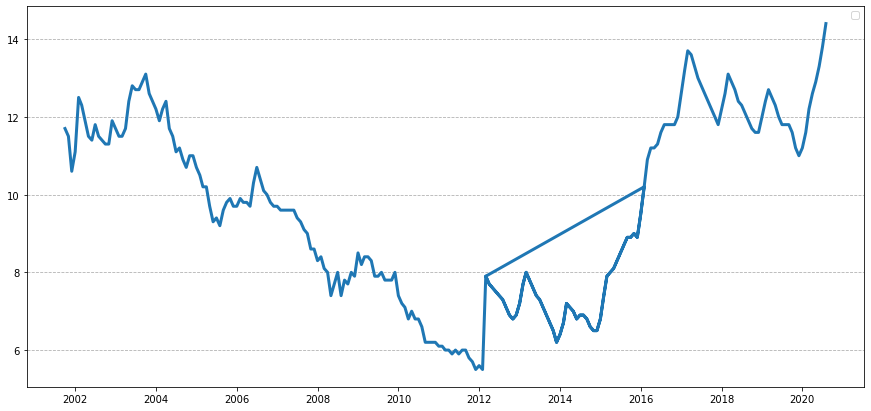

In [67]:
plotar(series=df)